UAS Deep Learning


---


Nama : Dionisius Avelino

---


NIM : 2602117033

**a. The dataset was found from paper titled “A simple dataset of water quality on aquaponic fish ponds based on
an internet of things measurement device” by Siswanto et.al. Explain the given dataset and perform exploratory
data analysis.**

The given dataset is a dataset which is collected using internet of things devices and sensors, with 3 types of sensor, which are, pH sensor, TDS sensor, and water temperature sensor.


---

This dataset is recorded in real-time in small fish ponds. The dataset included with 5 columns of data, which are, Id (Integer), created_date (Date Time), water_pH (Float), TDS (Integer), and water_temp (Float).

Perform exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Reading the dataset
url = '/content/Water-Quality-in-Fishpond-Data.csv'
df = pd.read_csv(url,sep=',',parse_dates=[0])
df.head()

,created_date,water_pH,TDS,water_temp
0,2023-01-26 10:38:00,7.940000,329.000000,23.690000
1,2023-01-26 10:39:00,5.980000,233.000000,23.750000
2,2023-01-26 10:40:00,7.430000,233.000000,23.750000
3,2023-01-26 10:41:00,7.433864,233.386364,23.755682
4,2023-01-26 10:42:00,7.437727,233.772727,23.761364


In [3]:
df = df.drop(columns =('created_date'))

In [4]:
df.head()

,water_pH,TDS,water_temp
0,7.940000,329.000000,23.690000
1,5.980000,233.000000,23.750000
2,7.430000,233.000000,23.750000
3,7.433864,233.386364,23.755682
4,7.437727,233.772727,23.761364


In [5]:
ph = df['water_pH']
TDS  = df['TDS']
water_temp = df['water_temp']

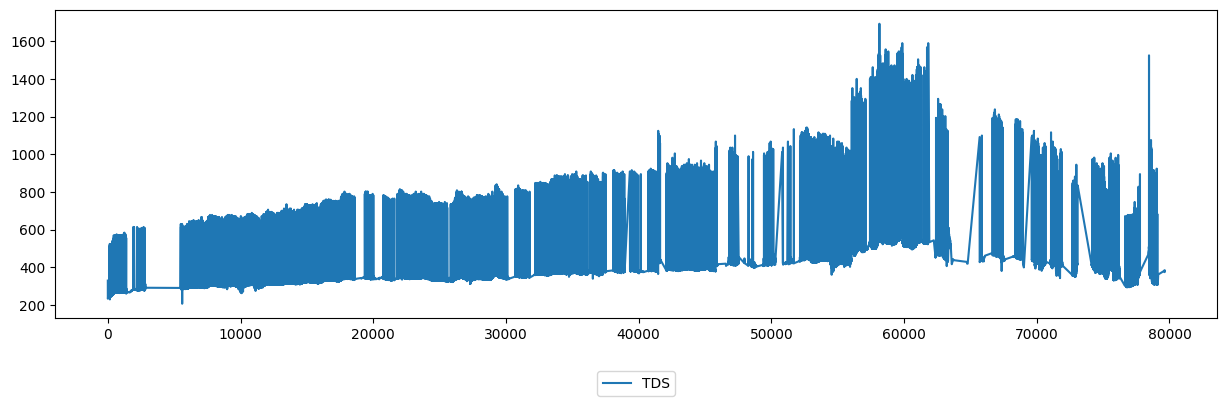

In [6]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(TDS)), TDS, label='TDS')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

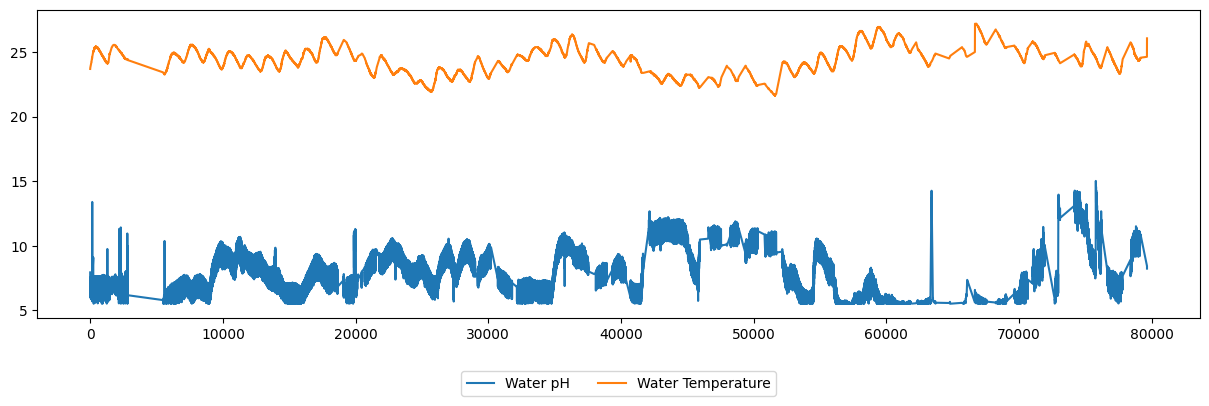

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(range(len(ph)),ph, label='Water pH')
plt.plot(range(len(water_temp)),water_temp, label='Water Temperature')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

<Axes: >

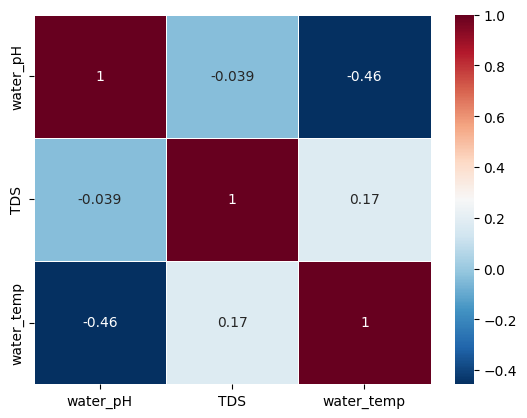

In [8]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

**b.The wanted scenario is we want to predict 3 minutes in the future based on the previous 30 minutes. To
implement that scenario, a sliding window mechanism is needed to be performed in the preprocessing dataset
step as in Figure 1. Then you also need to split the dataset with a ratio of 80% for training data and 20% for
testing data. For sliding window implementation proof, you need to add new column data for indexing
purposes. Please show the first and 500th sample input (features) and output (label/target) for each training
and test data.**

In [9]:
#Preprocessing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['water_pH','TDS','water_temp']] = scaler.fit_transform(df[['water_pH','TDS','water_temp']])

ph = df['water_pH']
TDS  = df['TDS']
water_temp = df['water_temp']

train_ratio = 0.8
train_len = int(train_ratio * ph.shape[0])
print(train_len)

63708


In [10]:
x_index = np.array(range(len(ph)))
x_index

array([    0,     1,     2, ..., 79633, 79634, 79635])

In [11]:
x_lbl = np.column_stack([ph,TDS, water_temp, x_index, [1]*train_len+[0]*(len(x_index)-train_len) ])
print(x_lbl.shape)
print(x_lbl)

(79636, 5)
[[ 1.33295635e-02 -5.78537111e-01 -6.68348393e-01  0.00000000e+00
   1.00000000e+00]
 [-1.03650416e+00 -1.21332161e+00 -6.09838767e-01  1.00000000e+00
   1.00000000e+00]
 [-2.59841456e-01 -1.21332161e+00 -6.09838767e-01  2.00000000e+00
   1.00000000e+00]
 ...
 [ 2.80073030e-01 -2.70402134e-01  1.36388594e+00  7.96330000e+04
   0.00000000e+00]
 [ 2.75787994e-01 -2.80981876e-01  1.64278182e+00  7.96340000e+04
   0.00000000e+00]
 [ 1.68662104e-01 -2.28083168e-01  1.64278182e+00  7.96350000e+04
   0.00000000e+00]]


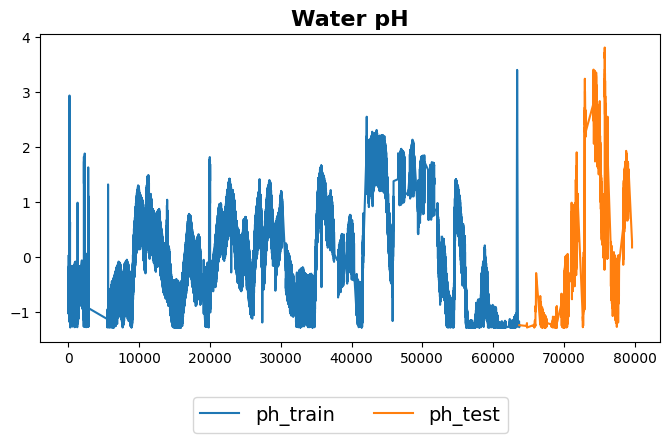

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(train_len), x_lbl[:train_len, 0], label='ph_train')
plt.plot(range(train_len, len(x_lbl)), x_lbl[train_len:, 0], label='ph_test')
plt.title("Water pH",weight='bold',fontsize=16)
plt.rcParams.update({'font.size': 14})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

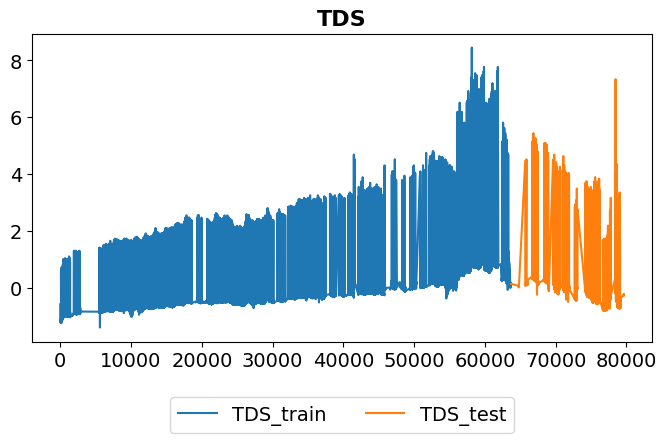

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(range(train_len), x_lbl[:train_len, 1], label='TDS_train')
plt.plot(range(train_len, len(x_lbl)), x_lbl[train_len:, 1], label='TDS_test')
plt.title("TDS",weight='bold',fontsize=16)
plt.rcParams.update({'font.size': 14})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

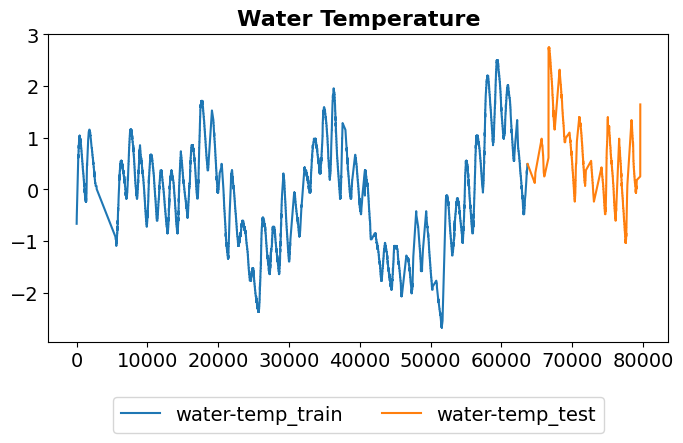

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(range(train_len), x_lbl[:train_len, 2], label='water-temp_train')
plt.plot(range(train_len, len(x_lbl)), x_lbl[train_len:, 2], label='water-temp_test')
plt.title("Water Temperature",weight='bold',fontsize=16)
plt.rcParams.update({'font.size': 14})
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

Sliding window mechanism

In [15]:
#To predict 3 minutes in the future based on previous 30 minutes
def truncate(x, feature_cols=range(4), target_cols=range(4), label_col=4, x_len=30, y_len=3):
    in_, out_, lbl = [], [], []
    for i in range(len(x)-x_len-y_len+1):
        in_.append(x[i:(i+x_len), feature_cols].tolist())
        out_.append(x[(i+x_len):(i+x_len+y_len), target_cols].tolist())
        lbl.append(x[i+x_len, label_col])
    return np.array(in_), np.array(out_), np.array(lbl)

X_in, X_out, lbl = truncate(x_lbl, feature_cols=range(4), target_cols=range(4),
                            label_col=4, x_len=30, y_len=3)
print(X_in.shape, X_out.shape, lbl.shape)

(79604, 30, 4) (79604, 3, 4) (79604,)


In [16]:
x_train_check = X_in[np.where(lbl==1)]
y_train_check = X_out[np.where(lbl==1)]
x_test_check = X_in[np.where(lbl==0)]
y_test_check = X_out[np.where(lbl==0)]
print(x_train_check.shape, y_train_check.shape)
print(x_test_check.shape, y_test_check.shape)

(63678, 30, 4) (63678, 3, 4)
(15926, 30, 4) (15926, 3, 4)


In [17]:
x_train = np.delete(x_train_check, 3, axis=2)
y_train = np.delete(y_train_check, 3, axis=2)
x_test = np.delete(x_test_check, 3, axis=2)
y_test = np.delete(y_test_check, 3, axis=2)

First input(x) and output(y), train and test data

In [18]:
x_train[0]

array([[ 0.01332956, -0.57853711, -0.66834839],
       [-1.03650416, -1.21332161, -0.60983877],
       [-0.25984146, -1.21332161, -0.60983877],
       [-0.25777198, -1.21076684, -0.60429808],
       [-0.2557025 , -1.20821208, -0.5987574 ],
       [-0.25363302, -1.20565731, -0.59321671],
       [-0.25156355, -1.20310254, -0.58767603],
       [-0.24949407, -1.20054778, -0.58213535],
       [-0.24742459, -1.19799301, -0.57659466],
       [-0.24535511, -1.19543824, -0.57105398],
       [-0.24328564, -1.19288347, -0.56551329],
       [-0.24121616, -1.19032871, -0.55997261],
       [-0.23914668, -1.18777394, -0.55443192],
       [-0.2370772 , -1.18521917, -0.54889124],
       [-0.23500773, -1.18266441, -0.54335056],
       [-0.23293825, -1.18010964, -0.53780987],
       [-0.23086877, -1.17755487, -0.53226919],
       [-0.22879929, -1.1750001 , -0.5267285 ],
       [-0.22672982, -1.17244534, -0.52118782],
       [-0.22466034, -1.16989057, -0.51564714],
       [-0.22259086, -1.1673358 , -0.510

In [19]:
y_train[0]

array([[-0.20189609, -1.14178813, -0.45469961],
       [-0.19982661, -1.13923336, -0.44915892],
       [-0.19775713, -1.1366786 , -0.44361824]])

In [20]:
x_test[0]

array([[-1.18140602,  0.14394788,  0.49209252],
       [-1.18704422,  0.14568797,  0.49209252],
       [-1.19268243,  0.14742806,  0.49209252],
       [-1.19832063,  0.14916815,  0.49209252],
       [-1.20395884,  0.15090824,  0.49209252],
       [-1.20959704,  0.15264833,  0.49209252],
       [-1.21523525,  0.15438841,  0.49209252],
       [-1.22087345,  0.1561285 ,  0.49209252],
       [-1.22651166,  0.15786859,  0.49209252],
       [-1.23214986,  0.15960868,  0.49209252],
       [-1.23778807,  0.16134877,  0.49209252],
       [-1.24342627,  0.16308886,  0.49209252],
       [-1.24906448,  0.16482895,  0.49209252],
       [-1.25470268,  0.16656904,  0.49209252],
       [-1.26034089,  0.16830913,  0.49209252],
       [-1.26597909,  0.17004922,  0.49209252],
       [-1.2716173 ,  0.17178931,  0.49209252],
       [-1.2772555 ,  0.17352939,  0.49209252],
       [-1.28289371,  0.17526948,  0.49209252],
       [-1.27039568,  0.16424892,  0.49209252],
       [-1.25789766,  0.15322836,  0.492

In [21]:
y_test[0]

array([[-1.24554046,  0.14168627,  0.48884515],
       [-1.24555611,  0.14162833,  0.48848433],
       [-1.24557175,  0.14157038,  0.48812351]])

500th input(x) and output(y), train and test data

In [22]:
x_train[499]

array([[-0.27055404,  0.95552543,  0.97967273],
       [-0.16878445,  0.95552543,  0.97967273],
       [-0.36161105, -0.97527742,  0.97967273],
       [-0.28126663, -0.9885021 ,  0.97967273],
       [-0.3187607 , -0.97527742,  0.97967273],
       [-0.20092222,  0.95552543,  0.97967273],
       [-0.3187607 , -1.02156379,  0.97967273],
       [-0.17949704,  0.95552543,  0.97967273],
       [-0.16878445, -0.99511444,  0.97967273],
       [-0.21163481,  0.95552543,  0.97967273],
       [-0.16878445, -0.99511444,  0.9114115 ],
       [-0.16878445, -0.97527742,  0.97967273],
       [-0.49016212, -1.00833912,  0.97967273],
       [-0.38839252, -0.99511444,  0.97967273],
       [-0.34018587,  0.98197479,  0.97967273],
       [-0.39910511, -0.99511444,  0.97967273],
       [-0.69370131, -0.99511444,  0.97967273],
       [-0.6026443 , -0.9885021 ,  0.97967273],
       [-0.16878445, -0.99511444,  0.97967273],
       [-0.16878445, -0.99511444,  0.97967273],
       [-0.35089846, -1.00833912,  0.979

In [23]:
y_train[499]

array([[-0.35089846,  0.92246374,  0.97967273],
       [-0.32947328, -0.99511444,  0.97967273],
       [-0.16878445, -0.99511444,  0.97967273]])

In [24]:
x_test[499]

array([[-1.25287864,  0.11450937,  0.31962111],
       [-1.25289428,  0.11445142,  0.31926029],
       [-1.25290993,  0.11439348,  0.31889947],
       [-1.25292558,  0.11433553,  0.31853865],
       [-1.25294122,  0.11427758,  0.31817783],
       [-1.25295687,  0.11421964,  0.31781701],
       [-1.25297252,  0.11416169,  0.31745619],
       [-1.25298816,  0.11410374,  0.31709537],
       [-1.25300381,  0.1140458 ,  0.31673455],
       [-1.25301946,  0.11398785,  0.31637374],
       [-1.2530351 ,  0.1139299 ,  0.31601292],
       [-1.25305075,  0.11387196,  0.3156521 ],
       [-1.25306639,  0.11381401,  0.31529128],
       [-1.25308204,  0.11375606,  0.31493046],
       [-1.25309769,  0.11369812,  0.31456964],
       [-1.25311333,  0.11364017,  0.31420882],
       [-1.25312898,  0.11358222,  0.313848  ],
       [-1.25314463,  0.11352428,  0.31348718],
       [-1.25316027,  0.11346633,  0.31312637],
       [-1.25317592,  0.11340838,  0.31276555],
       [-1.25319157,  0.11335044,  0.312

In [25]:
y_test[0]

array([[-1.24554046,  0.14168627,  0.48884515],
       [-1.24555611,  0.14162833,  0.48848433],
       [-1.24557175,  0.14157038,  0.48812351]])

**c.Based on requested prediction scenario in the Question number 1B, you have to develop four different
sequence-to-sequence predictive model.**

In [40]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import backend as k
from tensorflow.keras import optimizers, backend as K
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector, SimpleRNN, GRU, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.regularizers import l2

c.1. RNN Model

In [36]:
RNNmodel = Sequential()

RNNmodel.add(SimpleRNN(64, activation='tanh', input_shape=(30, 3), return_sequences=True))
RNNmodel.add(Dropout(0.3))

RNNmodel.add(SimpleRNN(32, activation='tanh', return_sequences=True))
RNNmodel.add(Dropout(0.3))

RNNmodel.add(SimpleRNN(16, activation='tanh', return_sequences=False))
RNNmodel.add(Dropout(0.2))

RNNmodel.add(RepeatVector(3))

RNNmodel.add(SimpleRNN(32, activation='tanh', return_sequences=True))
RNNmodel.add(Dropout(0.2))

RNNmodel.add(TimeDistributed(Dense(3)))

In [37]:
RNNmodel.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mse']
)

c.2.  CNN Model

In [41]:
CNNModel = Sequential()

CNNModel.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(30, 3)))
CNNModel.add(Dropout(0.3))
CNNModel.add(MaxPooling1D(pool_size=2))

CNNModel.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
CNNModel.add(Dropout(0.3))
CNNModel.add(MaxPooling1D(pool_size=2))

CNNModel.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
CNNModel.add(Dropout(0.2))
CNNModel.add(Flatten())

CNNModel.add(RepeatVector(3))

CNNModel.add(TimeDistributed(Dense(32, activation='relu')))
CNNModel.add(Dropout(0.2))

CNNModel.add(TimeDistributed(Dense(3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
CNNModel.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mse']
)

c.3. GRU Model

In [38]:
GRUModel = Sequential()

GRUModel.add(GRU(64, activation='tanh', input_shape=(30, 3), return_sequences=True))
GRUModel.add(Dropout(0.3))

GRUModel.add(GRU(32, activation='tanh', return_sequences=True))
GRUModel.add(Dropout(0.3))

GRUModel.add(GRU(16, activation='tanh', return_sequences=False))
GRUModel.add(Dropout(0.2))

GRUModel.add(RepeatVector(3))

GRUModel.add(GRU(32, activation='tanh', return_sequences=True))
GRUModel.add(Dropout(0.2))

GRUModel.add(TimeDistributed(Dense(3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
GRUModel.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mse']
)

c.4. LSTM Model

In [34]:
LSTMModel = Sequential()

LSTMModel.add(LSTM(64, activation='tanh', input_shape=(30, 3), return_sequences=True))
LSTMModel.add(Dropout(0.3))

LSTMModel.add(LSTM(32, activation='tanh', return_sequences=True))
LSTMModel.add(Dropout(0.3))

LSTMModel.add(LSTM(16, activation='tanh', return_sequences=False))
LSTMModel.add(Dropout(0.2))

LSTMModel.add(RepeatVector(3))

LSTMModel.add(LSTM(32, activation='tanh', return_sequences=True))
LSTMModel.add(Dropout(0.2))

LSTMModel.add(TimeDistributed(Dense(3)))

In [35]:
LSTMModel.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['mse']
)

Train the model

In [44]:
CNNhistory = CNNModel.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
print()
RNNhistory = RNNmodel.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
print()
GRUhistory = GRUModel.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
print()
LSTMhistory = LSTMModel.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1662 - mse: 0.1662 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 2/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1610 - mse: 0.1610 - val_loss: 0.6845 - val_mse: 0.6845
Epoch 3/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1658 - mse: 0.1658 - val_loss: 0.6298 - val_mse: 0.6298
Epoch 4/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1625 - mse: 0.1625 - val_loss: 0.7035 - val_mse: 0.7035
Epoch 5/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1629 - mse: 0.1629 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 6/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1639 - mse: 0.1639 - val_loss: 0.6821 - val_mse: 0.6821
Epoch 7/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1636 - mse: 0.1636 - val_loss: 0.6914 - val_mse: 0.6914
Epoch 8/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1621 - mse: 0.1621 - val_loss: 0.6809 - val_mse: 0.6809
Epoch 9/20
796/796 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

**d.Explain the architectures of the four sequence-to-sequence deep learning models you proposed in Number 1C.**

---

1. RNN Model is a model that takes one input at a time and update the hidden state to generate an output that will be influenced by every update.
2. CNN Model is a model that using convolutional layers with sliding kernel to detect local patterns that will use pooling and layers to generate an output.
3. GRU Model is a model that is kind of similar to RNN but uses gates to control the flow of the output or update.
4. LSTM Model is a model that is also kind of similar to RNN and GRU but uses multiple gate from the input until the output, so this model is more controlled and effective for complex data.

**e.Perform evaluation testing and fill the three table below based on your testing result**

In [45]:
#Evaluation
RNN_pred = RNNmodel.predict(x_test)
CNN_pred = CNNModel.predict(x_test)
GRU_pred = GRUModel.predict(x_test)
LSTM_pred = LSTMModel.predict(x_test)

498/498 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
498/498 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [52]:
#RNN Model Evaluation
print("RNN Model Evaluation: ")
print()
for i in range(RNN_pred.shape[1]):
  ph_MAE = mean_absolute_error(RNN_pred[:,i,0], y_test[:,i,0])
  ph_RMSE = np.sqrt(mean_squared_error(RNN_pred[:,i,0], y_test[:,i,0]))
  print(f"Water pH menit ke {i+1}:")
  print(f"ph_MAE      : {ph_MAE}")
  print(f"ph_RMSE     : {ph_RMSE}\n")

for i in range(RNN_pred.shape[1]):
  TDS_MAE = mean_absolute_error(RNN_pred[:,i,1], y_test[:,i,1])
  TDS_RMSE = np.sqrt(mean_squared_error(RNN_pred[:,i,1], y_test[:,i,1]))
  print(f"TDS menit ke {i+1}:")
  print(f"TDS_MAE      : {TDS_MAE}")
  print(f"TDS_RMSE     : {TDS_RMSE}\n")

for i in range(RNN_pred.shape[1]):
  temp_MAE = mean_absolute_error(RNN_pred[:,i,2], y_test[:,i,2])
  temp_RMSE = np.sqrt(mean_squared_error(RNN_pred[:,i,2], y_test[:,i,2]))
  print(f"Water Temperature menit ke {i+1}:")
  print(f"temp_MAE      : {temp_MAE}")
  print(f"temp_RMSE     : {temp_RMSE}\n")

RNN Model Evaluation: 

Water pH menit ke 1:
ph_MAE      : 0.40429294501998375
ph_RMSE     : 0.5750436478083751

Water pH menit ke 2:
ph_MAE      : 0.41307600098232017
ph_RMSE     : 0.5929547729672161

Water pH menit ke 3:
ph_MAE      : 0.42549164662155275
ph_RMSE     : 0.5974359081435237

TDS menit ke 1:
TDS_MAE      : 0.2962398919805651
TDS_RMSE     : 0.7116075820568352

TDS menit ke 2:
TDS_MAE      : 0.34413382738511833
TDS_RMSE     : 0.7310676102706204

TDS menit ke 3:
TDS_MAE      : 0.37781714629550345
TDS_RMSE     : 0.762344855567054

Water Temperature menit ke 1:
temp_MAE      : 0.137117480561163
temp_RMSE     : 0.2719405130883506

Water Temperature menit ke 2:
temp_MAE      : 0.1487008521894354
temp_RMSE     : 0.2871613174046099

Water Temperature menit ke 3:
temp_MAE      : 0.1351137975811734
temp_RMSE     : 0.27066932470841626



In [53]:
#CNN Model Evaluation
print("CNN Model Evaluation: ")
print()
for i in range(CNN_pred.shape[1]):
  ph_MAE = mean_absolute_error(CNN_pred[:,i,0], y_test[:,i,0])
  ph_RMSE = np.sqrt(mean_squared_error(CNN_pred[:,i,0], y_test[:,i,0]))
  print(f"Water pH menit ke {i+1}:")
  print(f"ph_MAE      : {ph_MAE}")
  print(f"ph_RMSE     : {ph_RMSE}\n")

for i in range(CNN_pred.shape[1]):
  TDS_MAE = mean_absolute_error(CNN_pred[:,i,1], y_test[:,i,1])
  TDS_RMSE = np.sqrt(mean_squared_error(CNN_pred[:,i,1], y_test[:,i,1]))
  print(f"TDS menit ke {i+1}:")
  print(f"TDS_MAE      : {TDS_MAE}")
  print(f"TDS_RMSE     : {TDS_RMSE}\n")

for i in range(CNN_pred.shape[1]):
  temp_MAE = mean_absolute_error(CNN_pred[:,i,2], y_test[:,i,2])
  temp_RMSE = np.sqrt(mean_squared_error(CNN_pred[:,i,2], y_test[:,i,2]))
  print(f"Water Temperature menit ke {i+1}:")
  print(f"temp_MAE      : {temp_MAE}")
  print(f"temp_RMSE     : {temp_RMSE}\n")

CNN Model Evaluation: 

Water pH menit ke 1:
ph_MAE      : 0.4094725837901919
ph_RMSE     : 0.4854706732791524

Water pH menit ke 2:
ph_MAE      : 0.4103864026090172
ph_RMSE     : 0.4871995803174025

Water pH menit ke 3:
ph_MAE      : 0.411099138097636
ph_RMSE     : 0.4885638848354559

TDS menit ke 1:
TDS_MAE      : 0.46601858761119863
TDS_RMSE     : 0.9313457941597373

TDS menit ke 2:
TDS_MAE      : 0.4698984404244447
TDS_RMSE     : 0.9367556981208558

TDS menit ke 3:
TDS_MAE      : 0.47193708013903074
TDS_RMSE     : 0.9395724491686939

Water Temperature menit ke 1:
temp_MAE      : 0.33422680472006455
temp_RMSE     : 0.4320628704799474

Water Temperature menit ke 2:
temp_MAE      : 0.33434334601591853
temp_RMSE     : 0.4325500265438775

Water Temperature menit ke 3:
temp_MAE      : 0.3345886323675686
temp_RMSE     : 0.43306237918607454



In [54]:
#GRU Model Evaluation
print("GRU Model Evaluation: ")
print()
for i in range(GRU_pred.shape[1]):
  ph_MAE = mean_absolute_error(GRU_pred[:,i,0], y_test[:,i,0])
  ph_RMSE = np.sqrt(mean_squared_error(GRU_pred[:,i,0], y_test[:,i,0]))
  print(f"Water pH menit ke {i+1}:")
  print(f"ph_MAE      : {ph_MAE}")
  print(f"ph_RMSE     : {ph_RMSE}\n")

for i in range(GRU_pred.shape[1]):
  TDS_MAE = mean_absolute_error(GRU_pred[:,i,1], y_test[:,i,1])
  TDS_RMSE = np.sqrt(mean_squared_error(GRU_pred[:,i,1], y_test[:,i,1]))
  print(f"TDS menit ke {i+1}:")
  print(f"TDS_MAE      : {TDS_MAE}")
  print(f"TDS_RMSE     : {TDS_RMSE}\n")

for i in range(GRU_pred.shape[1]):
  temp_MAE = mean_absolute_error(GRU_pred[:,i,2], y_test[:,i,2])
  temp_RMSE = np.sqrt(mean_squared_error(GRU_pred[:,i,2], y_test[:,i,2]))
  print(f"Water Temperature menit ke {i+1}:")
  print(f"temp_MAE      : {temp_MAE}")
  print(f"temp_RMSE     : {temp_RMSE}\n")

GRU Model Evaluation: 

Water pH menit ke 1:
ph_MAE      : 0.3233406134355176
ph_RMSE     : 0.4245274915349321

Water pH menit ke 2:
ph_MAE      : 0.32876322233238126
ph_RMSE     : 0.4294240360334545

Water pH menit ke 3:
ph_MAE      : 0.3255433855913186
ph_RMSE     : 0.4242611355622574

TDS menit ke 1:
TDS_MAE      : 0.2793542461735551
TDS_RMSE     : 0.6403116732413201

TDS menit ke 2:
TDS_MAE      : 0.28638140701165343
TDS_RMSE     : 0.6801800058025858

TDS menit ke 3:
TDS_MAE      : 0.3002332741147768
TDS_RMSE     : 0.686631429899441

Water Temperature menit ke 1:
temp_MAE      : 0.15001440720435896
temp_RMSE     : 0.2561737623798915

Water Temperature menit ke 2:
temp_MAE      : 0.13467838052194578
temp_RMSE     : 0.230952412994009

Water Temperature menit ke 3:
temp_MAE      : 0.13800600673851654
temp_RMSE     : 0.2347227230943196



In [55]:
#LSTM Model Evaluation
print("LSTM Model Evaluation: ")
print()
for i in range(LSTM_pred.shape[1]):
  ph_MAE = mean_absolute_error(LSTM_pred[:,i,0], y_test[:,i,0])
  ph_RMSE = np.sqrt(mean_squared_error(LSTM_pred[:,i,0], y_test[:,i,0]))
  print(f"Water pH menit ke {i+1}:")
  print(f"ph_MAE      : {ph_MAE}")
  print(f"ph_RMSE     : {ph_RMSE}\n")

for i in range(LSTM_pred.shape[1]):
  TDS_MAE = mean_absolute_error(LSTM_pred[:,i,1], y_test[:,i,1])
  TDS_RMSE = np.sqrt(mean_squared_error(LSTM_pred[:,i,1], y_test[:,i,1]))
  print(f"TDS menit ke {i+1}:")
  print(f"TDS_MAE      : {TDS_MAE}")
  print(f"TDS_RMSE     : {TDS_RMSE}\n")

for i in range(LSTM_pred.shape[1]):
  temp_MAE = mean_absolute_error(LSTM_pred[:,i,2], y_test[:,i,2])
  temp_RMSE = np.sqrt(mean_squared_error(LSTM_pred[:,i,2], y_test[:,i,2]))
  print(f"Water Temperature menit ke {i+1}:")
  print(f"temp_MAE      : {temp_MAE}")
  print(f"temp_RMSE     : {temp_RMSE}\n")

LSTM Model Evaluation: 

Water pH menit ke 1:
ph_MAE      : 0.38192869403481844
ph_RMSE     : 0.5125963679903847

Water pH menit ke 2:
ph_MAE      : 0.3871204923200561
ph_RMSE     : 0.5116928167571808

Water pH menit ke 3:
ph_MAE      : 0.3997002634768477
ph_RMSE     : 0.5207150648356887

TDS menit ke 1:
TDS_MAE      : 0.30972978276840707
TDS_RMSE     : 0.6696101290607687

TDS menit ke 2:
TDS_MAE      : 0.31784440412719983
TDS_RMSE     : 0.6946185752503684

TDS menit ke 3:
TDS_MAE      : 0.3203198526690686
TDS_RMSE     : 0.7093881044935305

Water Temperature menit ke 1:
temp_MAE      : 0.15602083303520525
temp_RMSE     : 0.2733501382922672

Water Temperature menit ke 2:
temp_MAE      : 0.1600864598785143
temp_RMSE     : 0.28479768378686526

Water Temperature menit ke 3:
temp_MAE      : 0.14779611376705276
temp_RMSE     : 0.2682717313633682



Evaluations Metrics table is on the answer paper.

**f.Visualize the comparison data between testing data and prediction results for each proposed model, features,
and three different times in the future.**

In [59]:
pred_len = 15926

RNN Model

Vizualization for RNN Model: 

Water pH Prediction



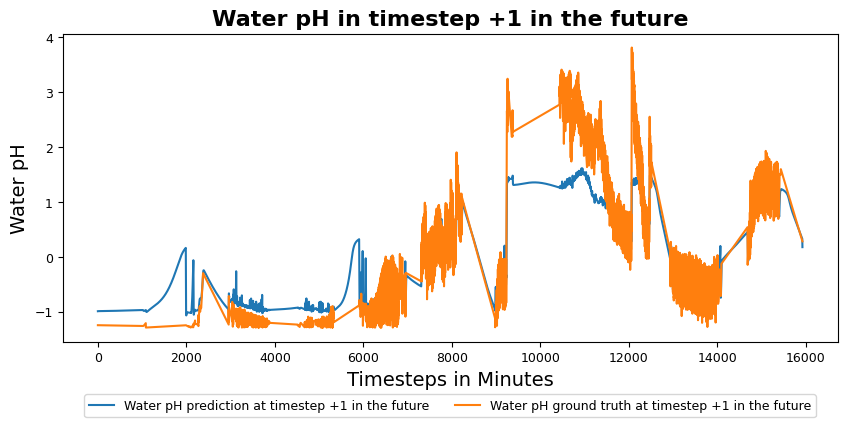

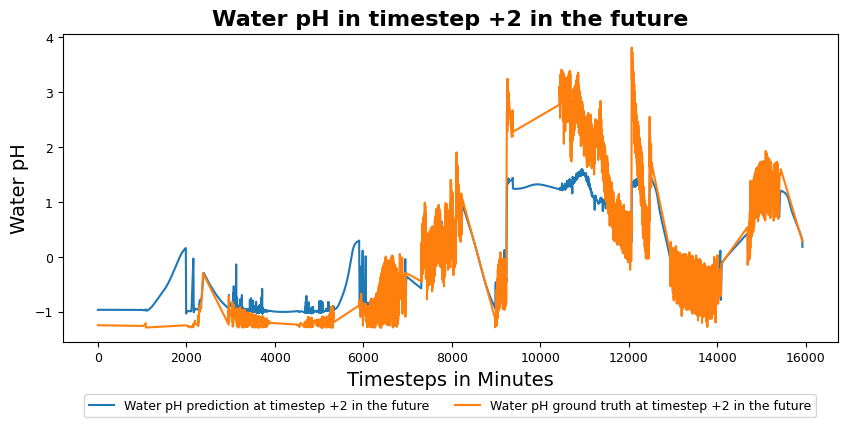

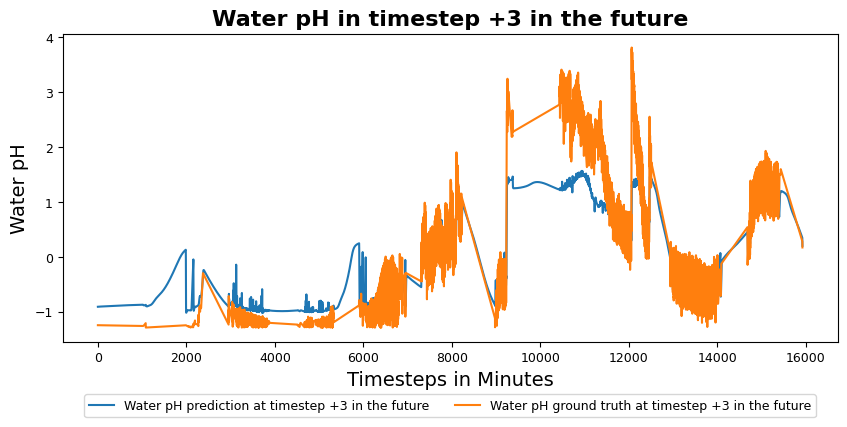


TDS Prediction



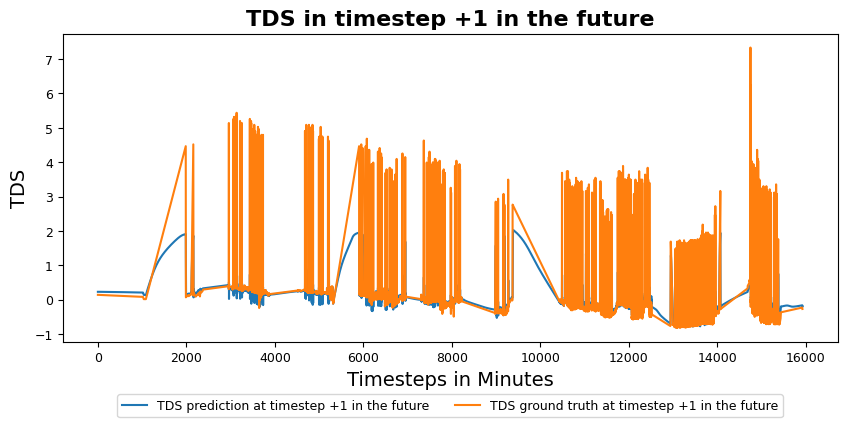

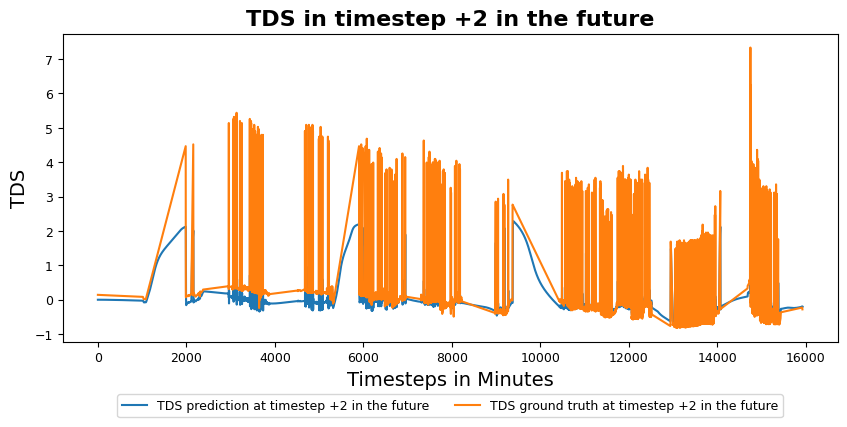

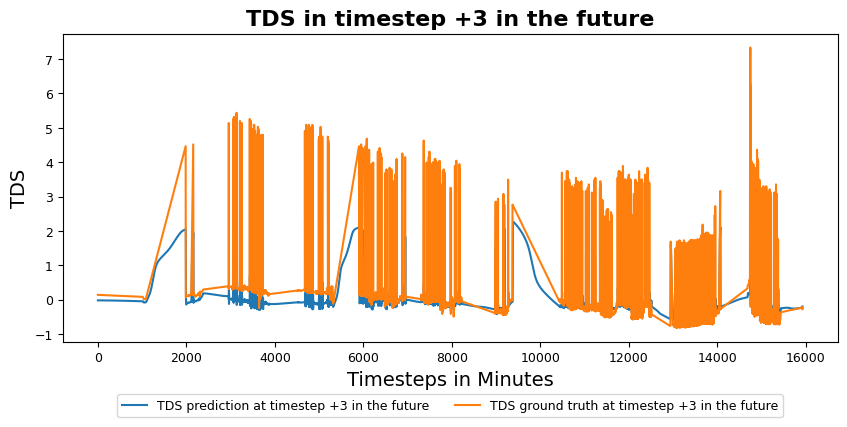


Water Temperature Prediction



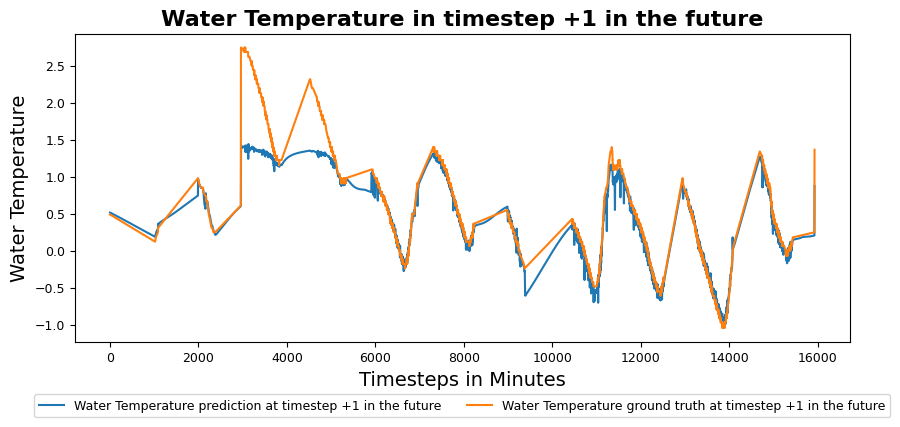

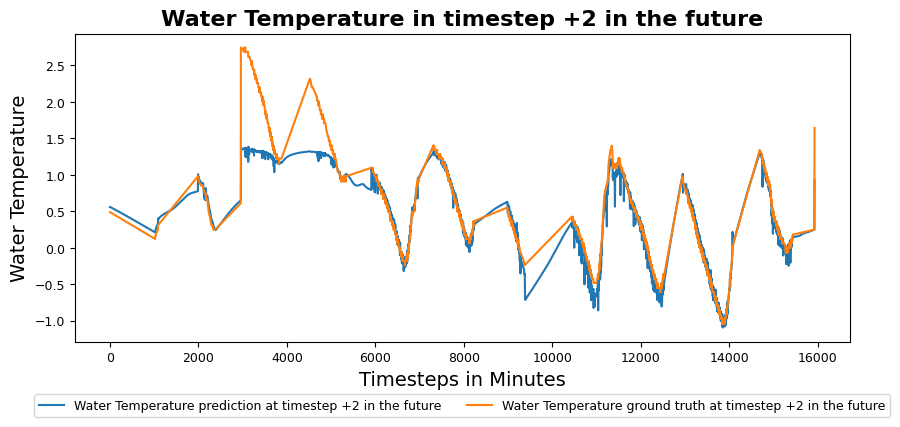

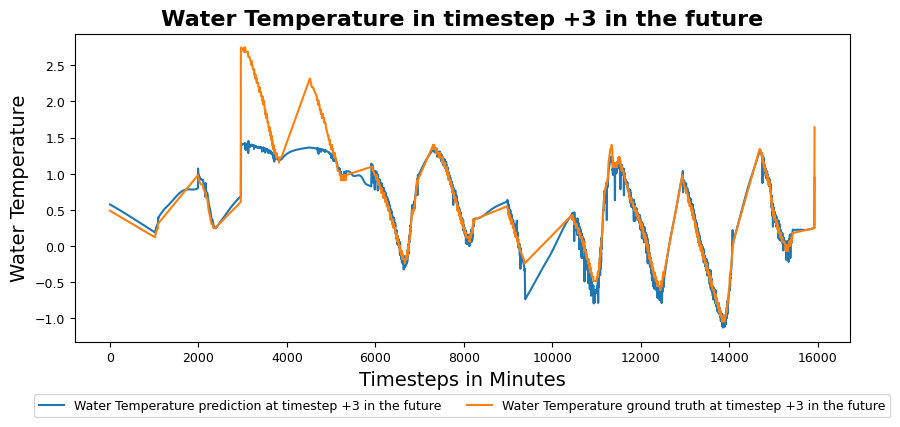

In [66]:
#RNN Model
print("Vizualization for RNN Model: ")
print()

print("Water pH Prediction")
print()
for i in range(RNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water pH', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), RNN_pred[:,i,0], label=f'Water pH prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,0], label=f'Water pH ground truth at timestep +{i+1} in the future')

  plt.title(f"Water pH in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()


print("TDS Prediction")
print()
for i in range(RNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('TDS', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), RNN_pred[:,i,1], label=f'TDS prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,1], label=f'TDS ground truth at timestep +{i+1} in the future')

  plt.title(f"TDS in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

print("Water Temperature Prediction")
print()
for i in range(RNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water Temperature', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), RNN_pred[:,i,2], label=f'Water Temperature prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,2], label=f'Water Temperature ground truth at timestep +{i+1} in the future')

  plt.title(f"Water Temperature in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

CNN Model

Vizualization for CNN Model: 

Water pH Prediction



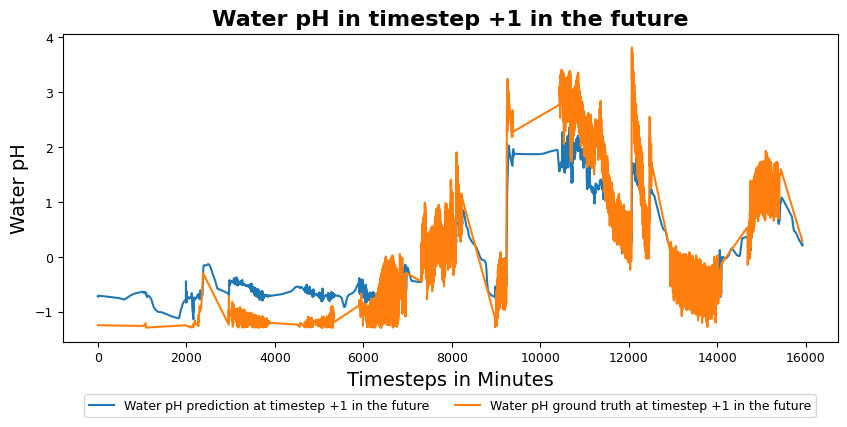

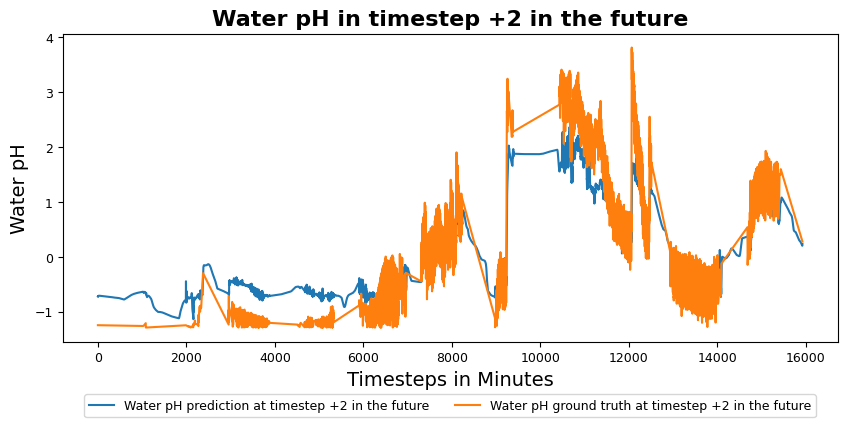

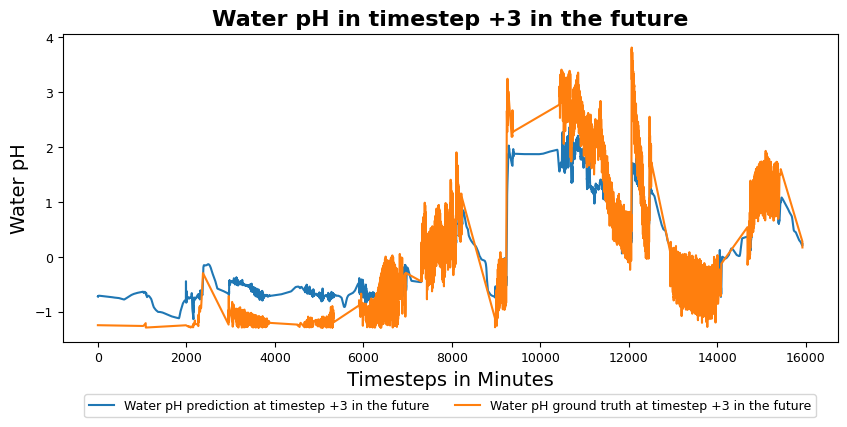


TDS Prediction



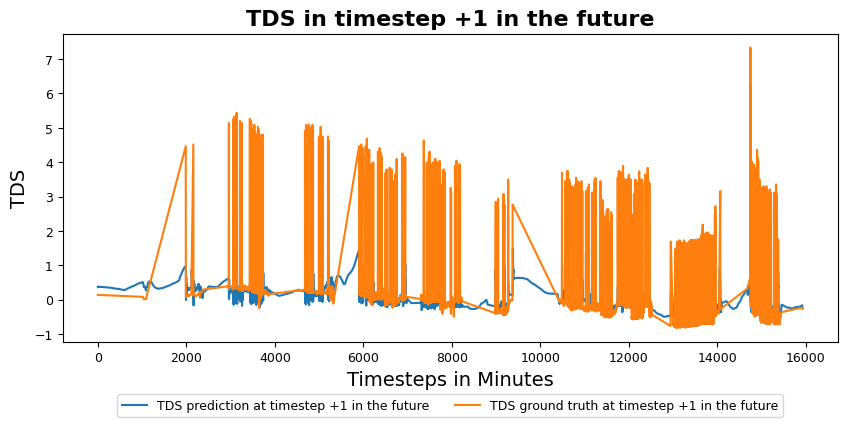

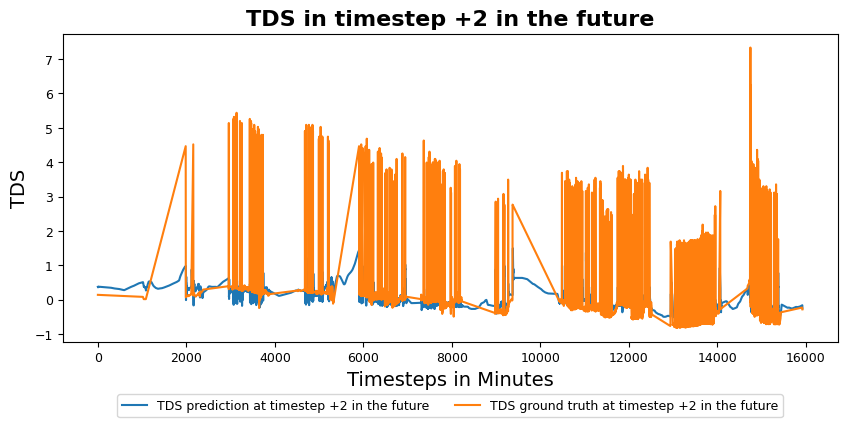

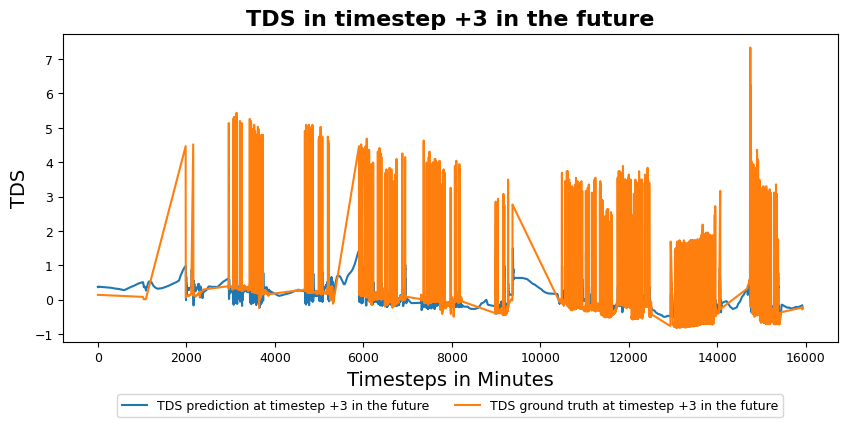


Water Temperature Prediction



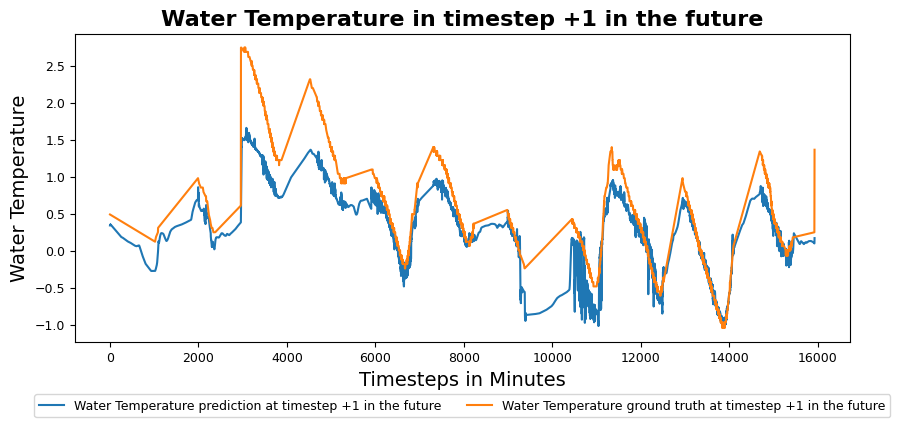

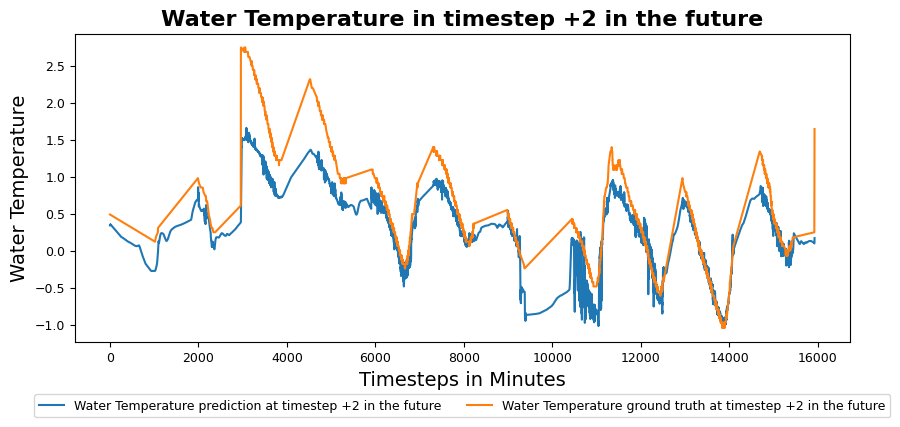

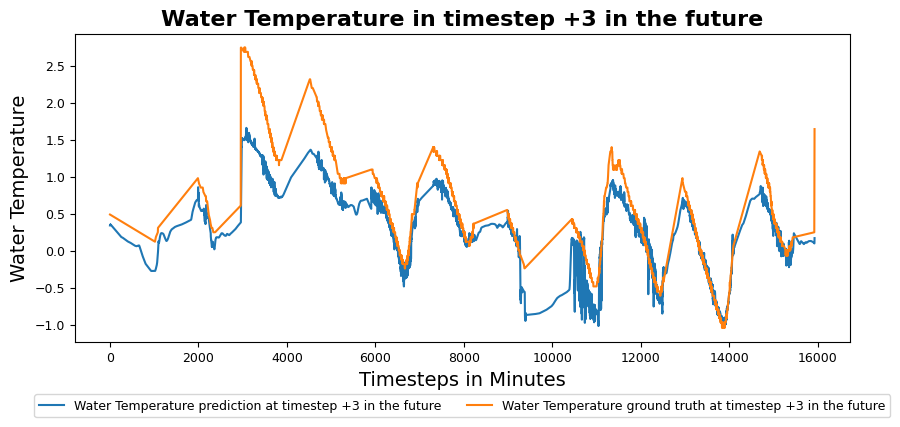

In [70]:
#CNN Model
print("Vizualization for CNN Model: ")
print()

print("Water pH Prediction")
print()
for i in range(CNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water pH', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), CNN_pred[:,i,0], label=f'Water pH prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,0], label=f'Water pH ground truth at timestep +{i+1} in the future')

  plt.title(f"Water pH in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()


print("TDS Prediction")
print()
for i in range(CNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('TDS', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), CNN_pred[:,i,1], label=f'TDS prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,1], label=f'TDS ground truth at timestep +{i+1} in the future')

  plt.title(f"TDS in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

print("Water Temperature Prediction")
print()
for i in range(CNN_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water Temperature', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), CNN_pred[:,i,2], label=f'Water Temperature prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,2], label=f'Water Temperature ground truth at timestep +{i+1} in the future')

  plt.title(f"Water Temperature in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

GRU Model

Vizualization for GRU Model: 

Water pH Prediction



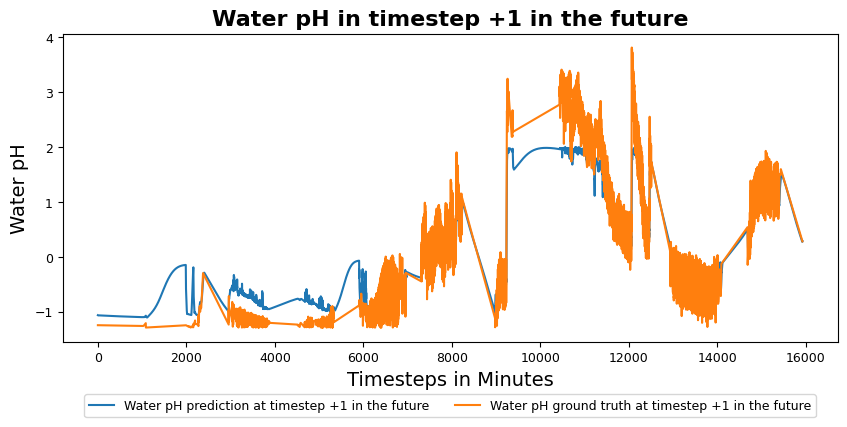

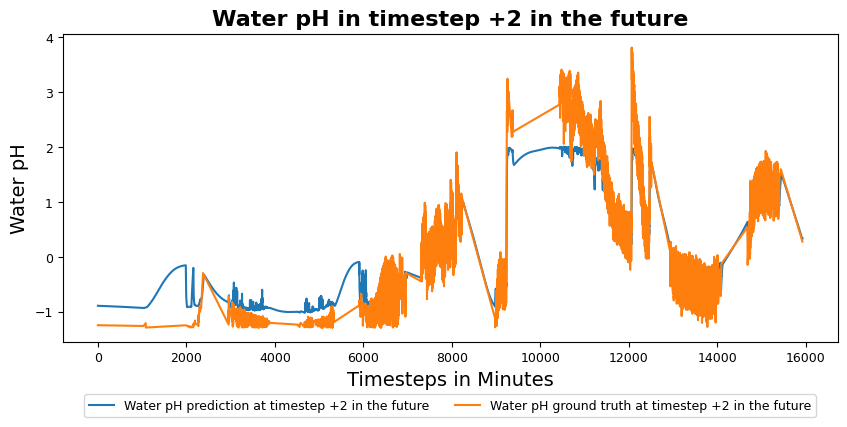

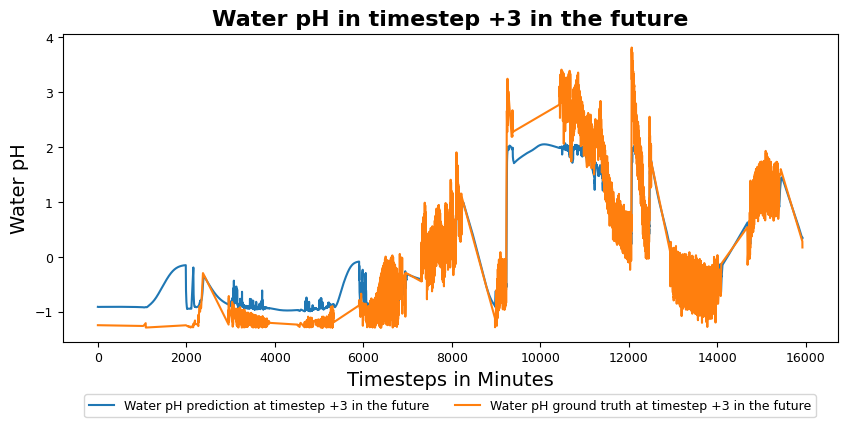


TDS Prediction



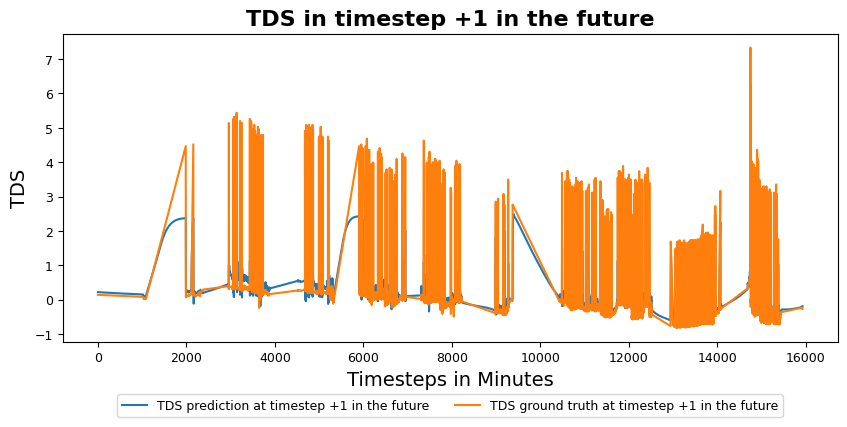

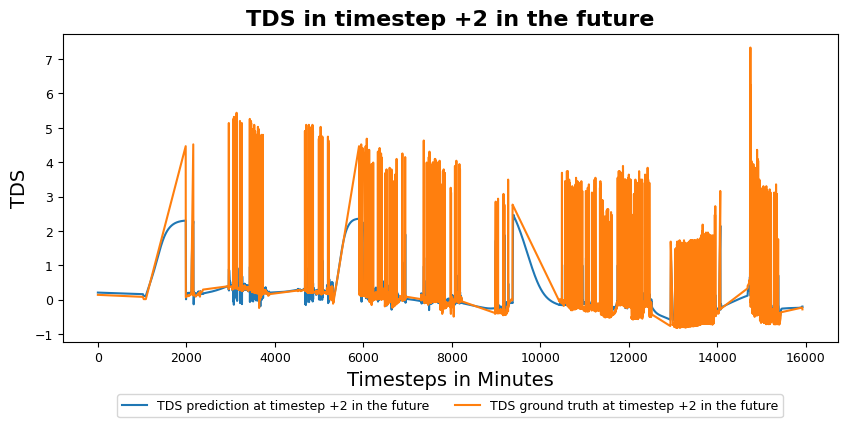

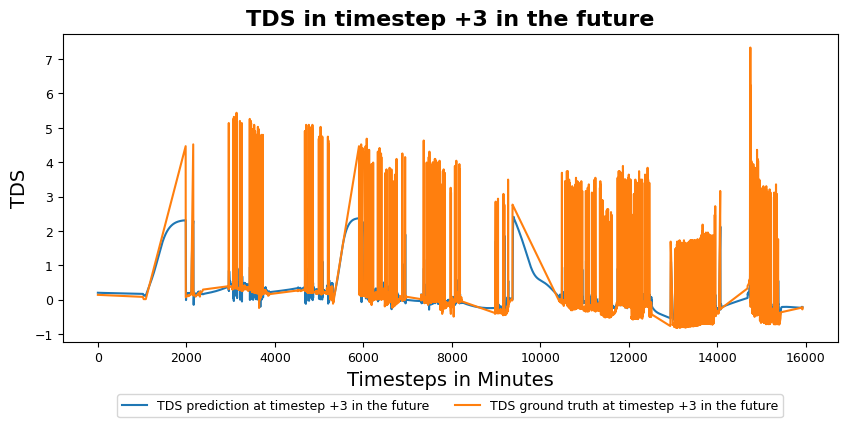


Water Temperature Prediction



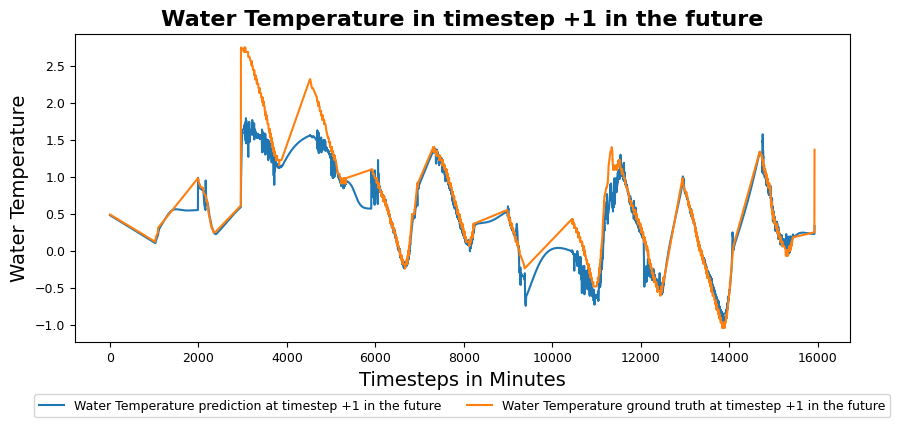

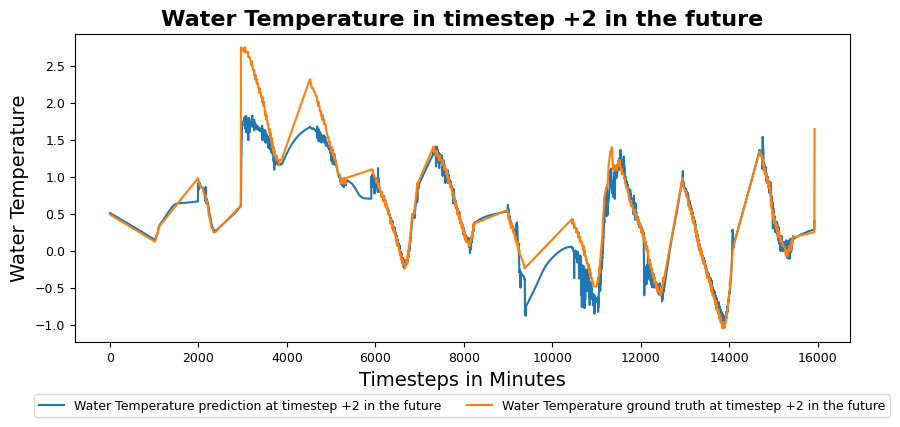

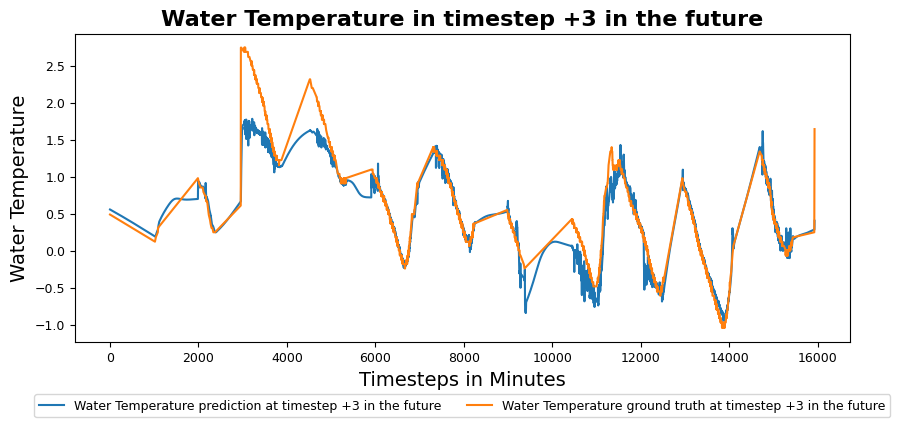

In [68]:
#GRU Model
print("Vizualization for GRU Model: ")
print()

print("Water pH Prediction")
print()
for i in range(GRU_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water pH', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), GRU_pred[:,i,0], label=f'Water pH prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,0], label=f'Water pH ground truth at timestep +{i+1} in the future')

  plt.title(f"Water pH in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()


print("TDS Prediction")
print()
for i in range(GRU_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('TDS', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), GRU_pred[:,i,1], label=f'TDS prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,1], label=f'TDS ground truth at timestep +{i+1} in the future')

  plt.title(f"TDS in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

print("Water Temperature Prediction")
print()
for i in range(GRU_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water Temperature', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), GRU_pred[:,i,2], label=f'Water Temperature prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,2], label=f'Water Temperature ground truth at timestep +{i+1} in the future')

  plt.title(f"Water Temperature in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

LSTM Model

Vizualization for LSTM Model: 

Water pH Prediction



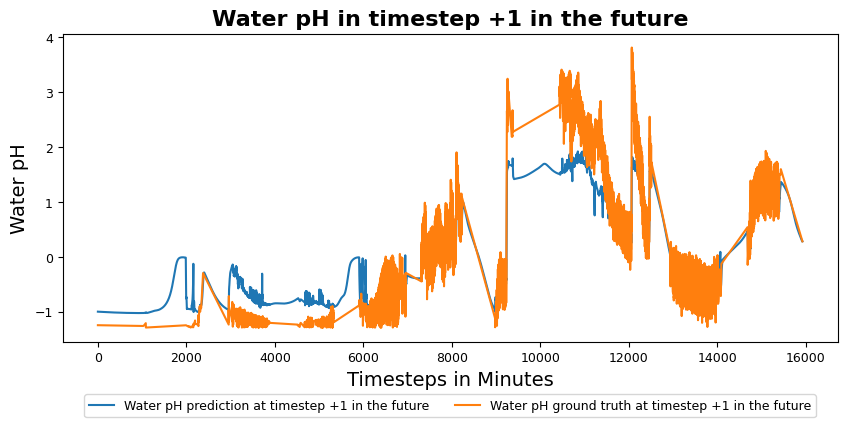

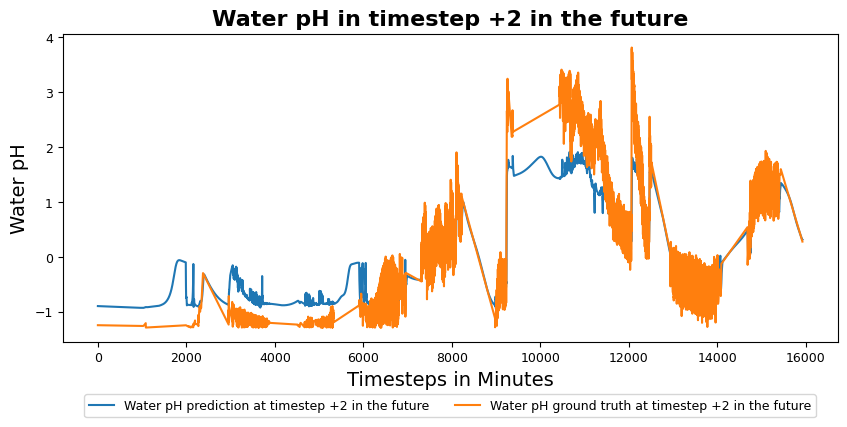

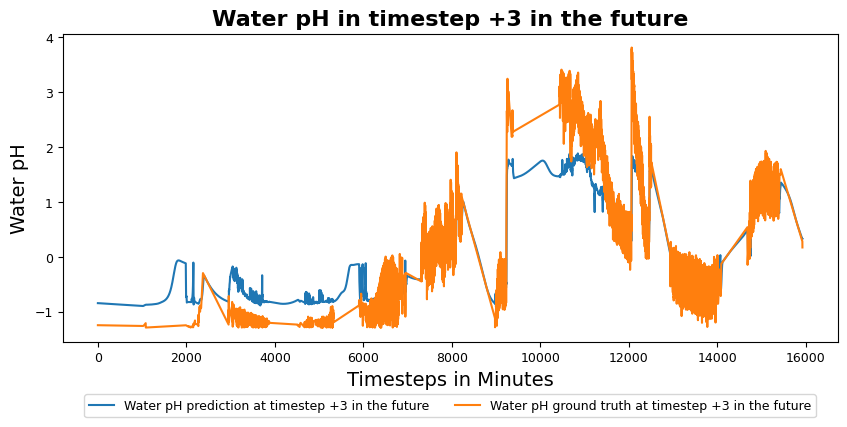


TDS Prediction



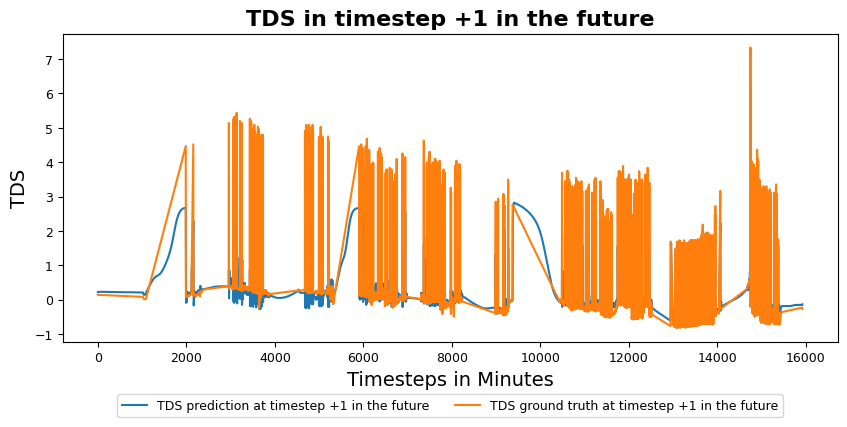

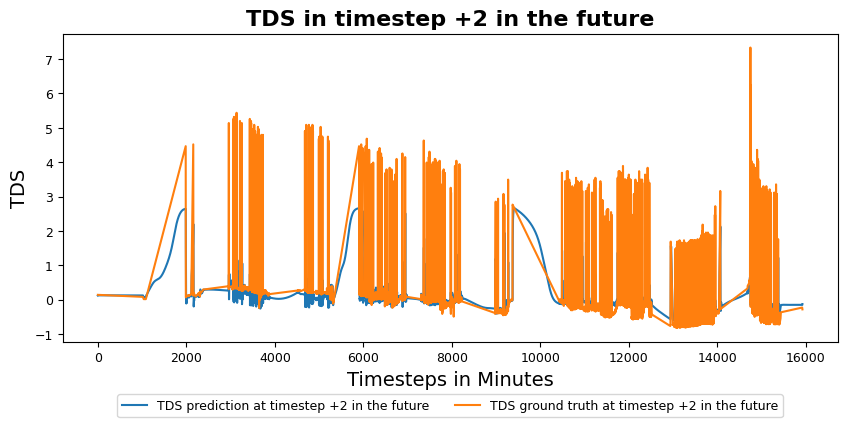

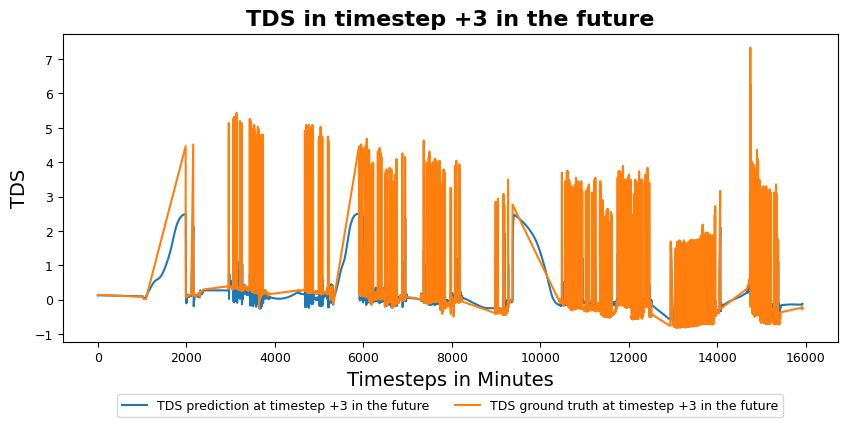


Water Temperature Prediction



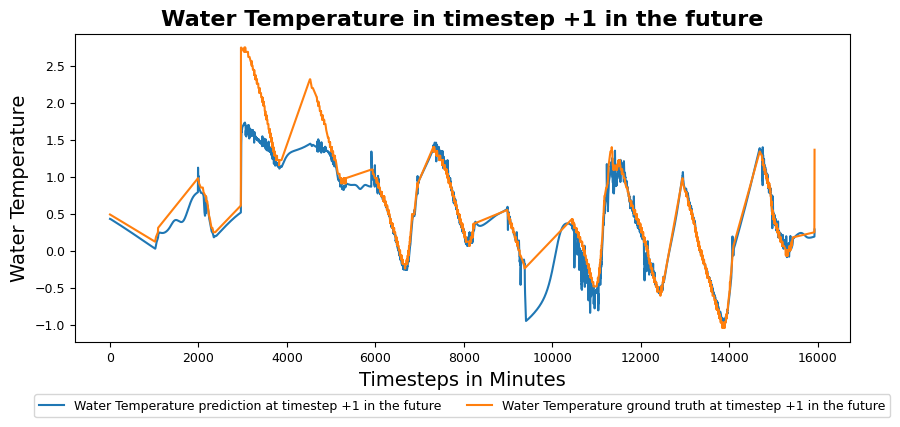

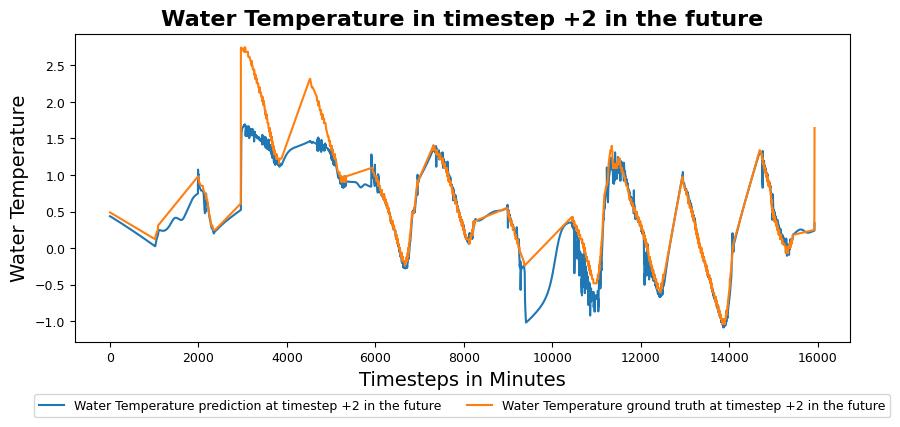

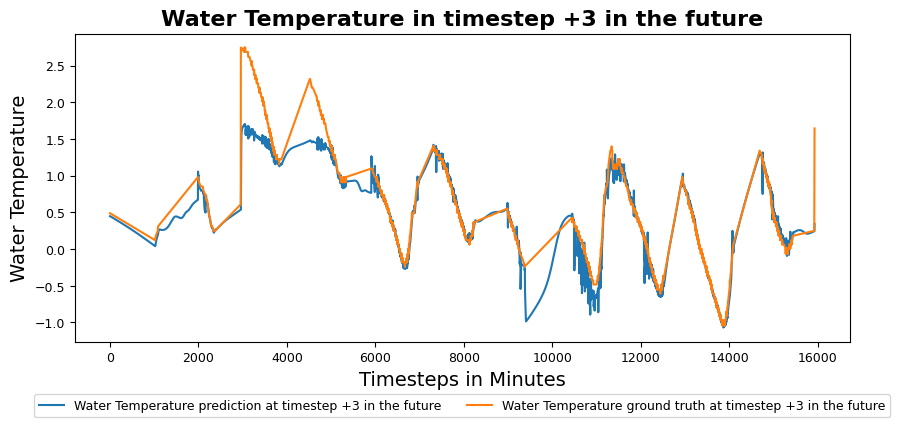

In [69]:
#LSTM Model
print("Vizualization for LSTM Model: ")
print()

print("Water pH Prediction")
print()
for i in range(LSTM_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water pH', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), LSTM_pred[:,i,0], label=f'Water pH prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,0], label=f'Water pH ground truth at timestep +{i+1} in the future')

  plt.title(f"Water pH in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()


print("TDS Prediction")
print()
for i in range(LSTM_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('TDS', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), LSTM_pred[:,i,1], label=f'TDS prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,1], label=f'TDS ground truth at timestep +{i+1} in the future')

  plt.title(f"TDS in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()

print("Water Temperature Prediction")
print()
for i in range(LSTM_pred.shape[1]):
  plt.figure(figsize=(10, 4))
  plt.xlabel('Timesteps in Minutes', fontsize=14)
  plt.ylabel('Water Temperature', fontsize=14)
  plt.rcParams['font.size'] = '18'

  plt.plot(range(pred_len), LSTM_pred[:,i,2], label=f'Water Temperature prediction at timestep +{i+1} in the future')
  plt.plot(range(pred_len), y_test[:, i,2], label=f'Water Temperature ground truth at timestep +{i+1} in the future')

  plt.title(f"Water Temperature in timestep +{i+1} in the future",weight='bold',fontsize=16)
  plt.rcParams.update({'font.size': 9})
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
  plt.show()
  print()